In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import math 
import statistics
import matplotlib.pyplot as plt
import dask.dataframe as dd
import os
import seaborn as sns
import pylab as pl
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mticker
from matplotlib import cm
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()

Data has been divided into twelve folders based on their values of metallicity and alpha (common envelope efficiency); each folder contains two .csv files, one containing the initial conditions of the evolved systems, one system per row, the other contains the properties of the binary systems during their evolution.

To better study the previously filterd data, we decided to import data from .csv to Pandas dataframe structures, successively joining evolved and output dataframes.


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
metallicity = [0.01, 0.02, 0.014, 0.016]
alpha = [0.5, 1, 3]

In [4]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [5]:
count=0
names=[]
for i in metallicity :
    for j in alpha :
        count +=1
        df_tmp_o = pd.read_csv("F_data/"+"F_sevn_output_Z"+"{}".format(i)+"A"+"{}".format(j)+"L1/FZ"+"{}".format(i)+"A"+"{}".format(j)+".csv", sep=",")
        df_tmp_i = pd.read_csv("F_data/"+"F_sevn_output_Z"+"{}".format(i)+"A"+"{}".format(j)+"L1/init_Z"+"{}".format(i)+"A"+"{}".format(j)+".csv", sep=",")
        df_tmp_i.sort_values(by='#ID')
        df_tmp_i.rename(columns = {'#ID':'ID'}, inplace = True)
        globals()["df_"+str(count)] = df_tmp_o.merge(df_tmp_i, how='left', left_on='ID', right_on='ID')
        
        #print dataframe names
        print(get_df_name(globals()["df_"+str(count)]),",")
        #create an array with name of the .csv files
        names.append("Z"+str(i)+"A"+str(j))
        

df_1 ,
df_2 ,
df_3 ,
df_4 ,
df_5 ,
df_6 ,
df_7 ,
df_8 ,
df_9 ,
df_10 ,
df_11 ,
df_12 ,


#### BWorldTime
We studied the time span in which binary systems check the conditions of the filter.

Only a little fraction of lifetime meet the condition, and where is larger we have more time to observe the system evolution.

We put the ages of the systems for different metallicity and alpha in a separate dataframe and plot the histograms together to compare the systems by their ages.

In [6]:
names

['Z0.01A0.5',
 'Z0.01A1',
 'Z0.01A3',
 'Z0.02A0.5',
 'Z0.02A1',
 'Z0.02A3',
 'Z0.014A0.5',
 'Z0.014A1',
 'Z0.014A3',
 'Z0.016A0.5',
 'Z0.016A1',
 'Z0.016A3']

In [7]:
for i in range(0,11):
    names[i] = names[i].replace('.', '_')

In [8]:
names

['Z0_01A0_5',
 'Z0_01A1',
 'Z0_01A3',
 'Z0_02A0_5',
 'Z0_02A1',
 'Z0_02A3',
 'Z0_014A0_5',
 'Z0_014A1',
 'Z0_014A3',
 'Z0_016A0_5',
 'Z0_016A1',
 'Z0.016A3']

In [9]:
df_list = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
abs_max = 0
abs_min = 0
for i in range(1,12):
    x = globals()["df_"+str(i)]
    max_val = x['BWorldtime'].max()
    min_val = x['BWorldtime'].min()
    if max_val > abs_max:
        abs_max = max_val
    else :
        continue
print('BWorldtime range:')
print("max value:",abs_max)
print("min value:",abs_min)

BWorldtime range:
max value: 11.99965
min value: 0


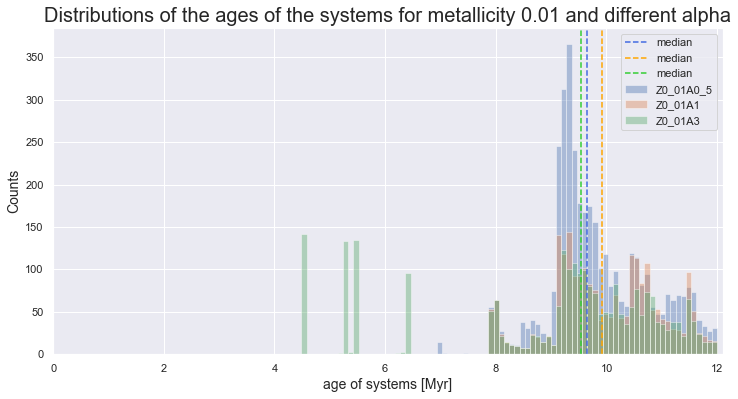

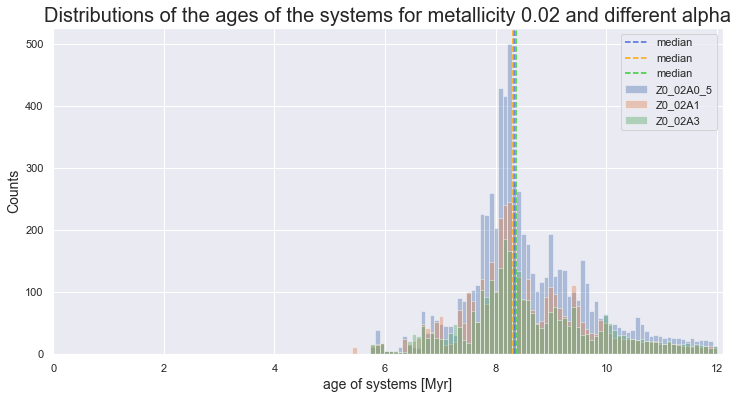

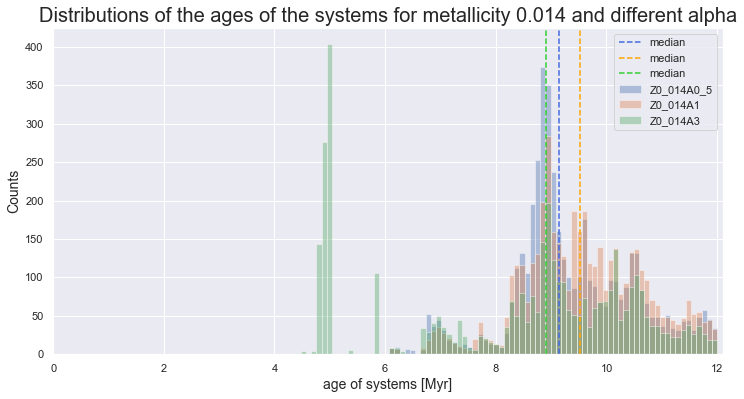

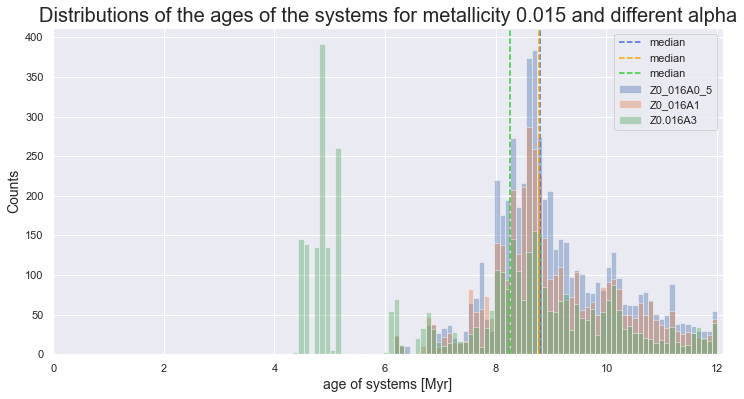

In [10]:
plt.figure(figsize=(12,6))
colors = ['black', 'royalblue', 'orange', 'limegreen']
bins = 80
bins = np.histogram(np.hstack((df_1['BWorldtime'],df_2['BWorldtime'],df_3['BWorldtime'])), bins=bins)[1]
for i in range(1,4):
    x = globals()["df_"+str(i)]
    plt.hist(x['BWorldtime'], bins=bins, alpha=0.4, label=names[i-1])
    plt.axvline(x['BWorldtime'].median(), color=colors[i], linestyle='dashed', label='median') #median is plotted but we can change to mean
    plt.title("Distributions of the ages of the systems for metallicity 0.01 and different alpha", fontsize=20)
    plt.xlabel("age of systems [Myr]", size=14)
    plt.ylabel("Counts", size=14)
    plt.xlim(0, 12.1)
    plt.legend(loc='upper right')

#figure, axis = plt.subplots(2, 2)

plt.show()

plt.figure(figsize=(12,6))
colors = ['black', 'black', 'black', 'black', 'royalblue', 'orange', 'limegreen']
bins = 80
bins = np.histogram(np.hstack((df_4['BWorldtime'],df_5['BWorldtime'],df_6['BWorldtime'])), bins=bins)[1]
for i in range(4,7):
    x = globals()["df_"+str(i)]
    plt.hist(x['BWorldtime'], bins=bins, alpha=0.4, label=names[i-1])
    plt.axvline(x['BWorldtime'].median(), color=colors[i], linestyle='dashed', label='median')
    plt.title("Distributions of the ages of the systems for metallicity 0.02 and different alpha", fontsize=20)
    plt.xlabel("age of systems [Myr]", size=14)
    plt.ylabel("Counts", size=14)
    plt.xlim(0, 12.1)
    plt.legend(loc='upper right')

plt.show()

plt.figure(figsize=(12,6))
colors = ['black', 'black', 'black', 'black', 'black', 'black', 'black', 'royalblue', 'orange', 'limegreen']
bins = 80
bins = np.histogram(np.hstack((df_7['BWorldtime'],df_8['BWorldtime'],df_9['BWorldtime'])), bins=bins)[1]
for i in range(7,10):
    x = globals()["df_"+str(i)]
    plt.hist(x['BWorldtime'], bins=bins, alpha=0.4, label=names[i-1])
    plt.axvline(x['BWorldtime'].median(), color=colors[i], linestyle='dashed', label='median')
    plt.title("Distributions of the ages of the systems for metallicity 0.014 and different alpha", fontsize=20)
    plt.xlabel("age of systems [Myr]", size=14)
    plt.ylabel("Counts", size=14)
    plt.xlim(0, 12.1)
    plt.legend(loc='upper right')

plt.show()

plt.figure(figsize=(12,6))
colors = ['black', 'black', 'black', 'black', 'black', 'black','black','black',
          'black', 'black', 'royalblue', 'orange', 'limegreen']
bins = 80
bins = np.histogram(np.hstack((df_10['BWorldtime'],df_11['BWorldtime'],df_12['BWorldtime'])), bins=bins)[1]
for i in range(10,13):
    x = globals()["df_"+str(i)]
    plt.hist(x['BWorldtime'], bins=bins, alpha=0.4, label=names[i-1])
    plt.axvline(x['BWorldtime'].median(), color=colors[i], linestyle='dashed', label='median')
    plt.title("Distributions of the ages of the systems for metallicity 0.015 and different alpha", fontsize=20)
    plt.xlabel("age of systems [Myr]", size=14)
    plt.ylabel("Counts", size=14)
    plt.xlim(0, 12.1)
    plt.legend(loc='upper right')

plt.show()


(array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

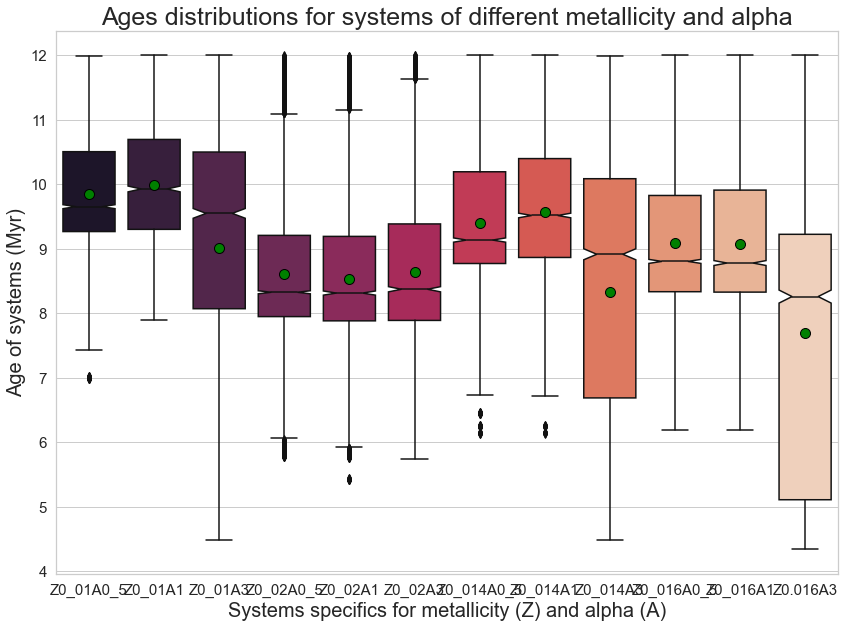

In [11]:
plt.figure(figsize=(14,10))
sns.set_style("whitegrid")
data = []
for i in range(1,13):
    x = globals()["df_"+str(i)]
    data.append(x['BWorldtime'])
df_time = pd.concat(data, axis = 1, keys = names)
sns.boxplot(data = df_time, palette="rocket", 
            showmeans=True, meanprops={"marker":"o",
                                       "markerfacecolor":"green", 
                                       "markeredgecolor":"black",
                                       "markersize":"10"},
            notch = True #Notches are used in box plots to help visually assess whether the medians of distributions differ.
           )
plt.title('Ages distributions for systems of different metallicity and alpha', fontsize=25)
plt.xlabel('Systems specifics for metallicity (Z) and alpha (A)', fontsize=20)
plt.ylabel('Age of systems (Myr)', fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)


#In box plots, dots are outliers, the outliers are points that stay out of the interval [Q1-1.5*IQR; Q3+1.5*IQR], with
#Q1 = Quartile 1 (25th percentile)
#Q3 = Quartile 3 (75th percentile)
#IQR = Interquartile range from Q1 to Q3




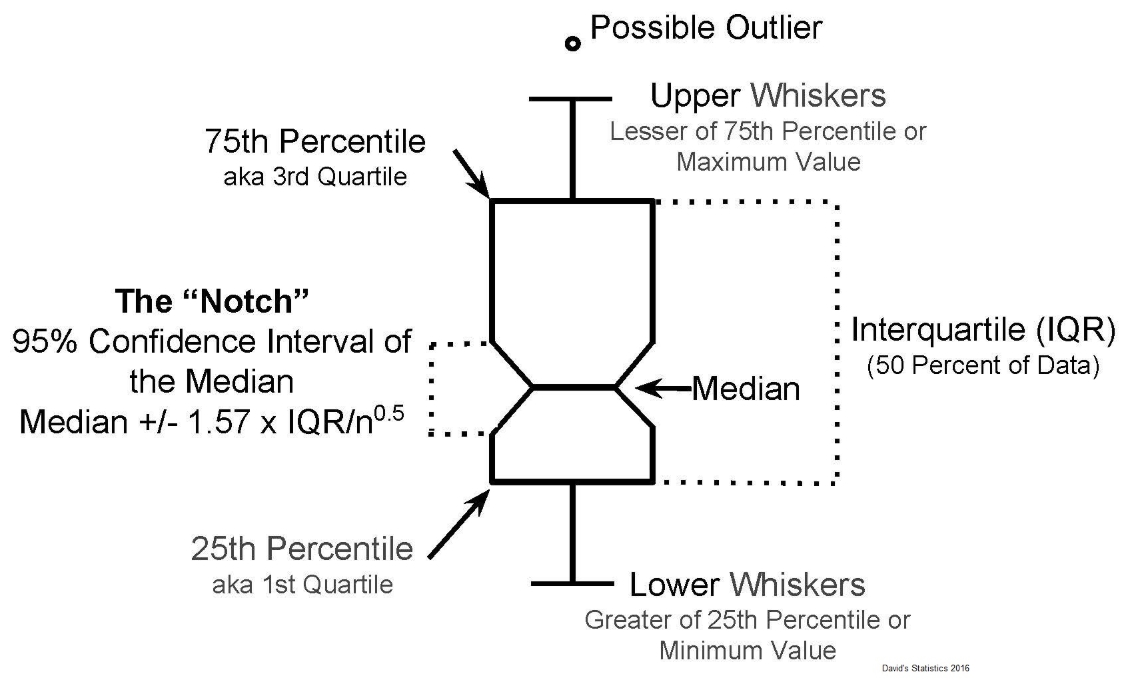

#### Remnant type
Check the remnant type of the objects in the binary systems of different folders.

In [12]:
data_r1 = []
for i in range(1,13):
    x = globals()["df_"+str(i)]
    data_r1.append(x['RemnantType_0'])
df_r1 = pd.concat(data_r1, axis = 1, keys = names)

data_r2 = []
for i in range(1,13):
    x = globals()["df_"+str(i)]
    data_r2.append(x['RemnantType_1'])
df_r2 = pd.concat(data_r1, axis = 1, keys = names)

for i in range(1,13):

    print("Remnant type of first object  ",names[i-1])
    print("Electron capture Neutron Star:",df_r1[df_r1[names[i-1]]==4].size)
    print("Core collapse Neutron Star:   ",df_r1[df_r1[names[i-1]]==5].size)
    print("Black hole:                   ",df_r1[df_r1[names[i-1]]==6].size)
    print("\n")
    print("Remnant type of second object ",names[i-1])
    print("Electron capture Neutron Star:",df_r2[df_r2[names[i-1]]==4].size)
    print("Core collapse Neutron Star:   ",df_r2[df_r2[names[i-1]]==5].size)
    print("Black hole:                   ",df_r2[df_r2[names[i-1]]==6].size)
    print("\n")

Remnant type of first object   Z0_01A0_5
Electron capture Neutron Star: 0
Core collapse Neutron Star:    47352
Black hole:                    0


Remnant type of second object  Z0_01A0_5
Electron capture Neutron Star: 0
Core collapse Neutron Star:    47352
Black hole:                    0


Remnant type of first object   Z0_01A1
Electron capture Neutron Star: 0
Core collapse Neutron Star:    28104
Black hole:                    0


Remnant type of second object  Z0_01A1
Electron capture Neutron Star: 0
Core collapse Neutron Star:    28104
Black hole:                    0


Remnant type of first object   Z0_01A3
Electron capture Neutron Star: 0
Core collapse Neutron Star:    24276
Black hole:                    6180


Remnant type of second object  Z0_01A3
Electron capture Neutron Star: 0
Core collapse Neutron Star:    24276
Black hole:                    6180


Remnant type of first object   Z0_02A0_5
Electron capture Neutron Star: 0
Core collapse Neutron Star:    82536
Black hole:    

#### Mass distribution

Plot the mass distribution of the stars and compact objects in the binaries.

In [13]:
data_mass_0 = []
data_mass_1 = []

for i in range(1,13):
    x = globals()["df_"+str(i)]
    data_mass_0.append(x['Mass_0_x'])
df_mass_0 = pd.concat(data_mass_0, axis = 1, keys = names)

for i in range(1,13):
    x = globals()["df_"+str(i)]
    data_mass_1.append(x['Mass_1_x'])
df_mass_1 = pd.concat(data_mass_1, axis = 1, keys = names)

In [14]:
print(df_mass_0.max().max())
print(df_mass_0.min().min())

print(df_mass_1.max().max())
print(df_mass_1.min().min())

15.61713
1.193223
15.20226
0.001003379


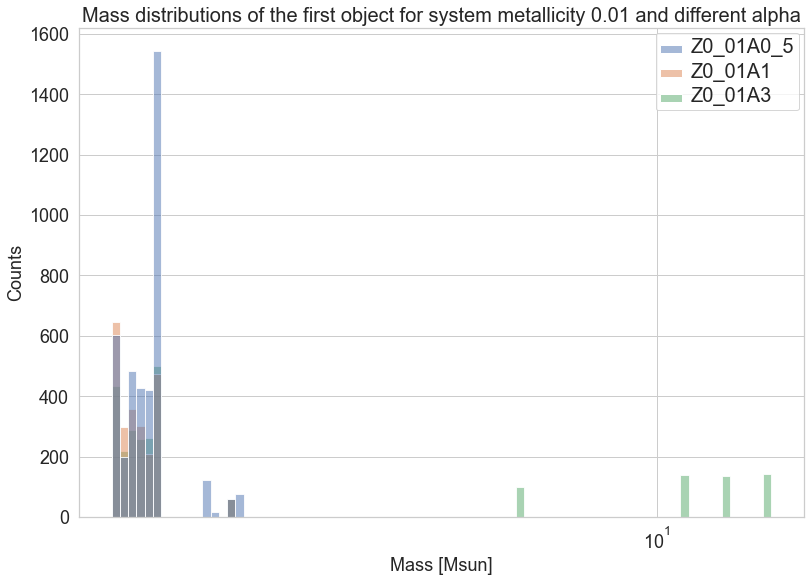

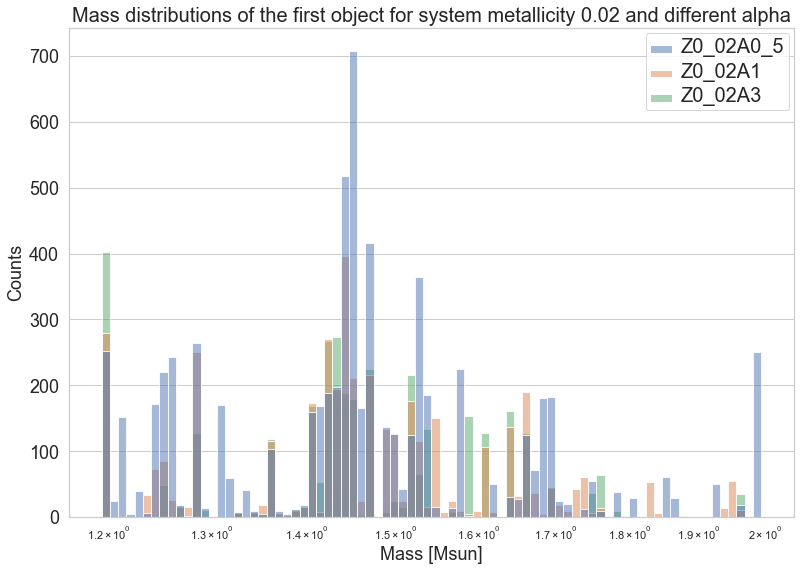

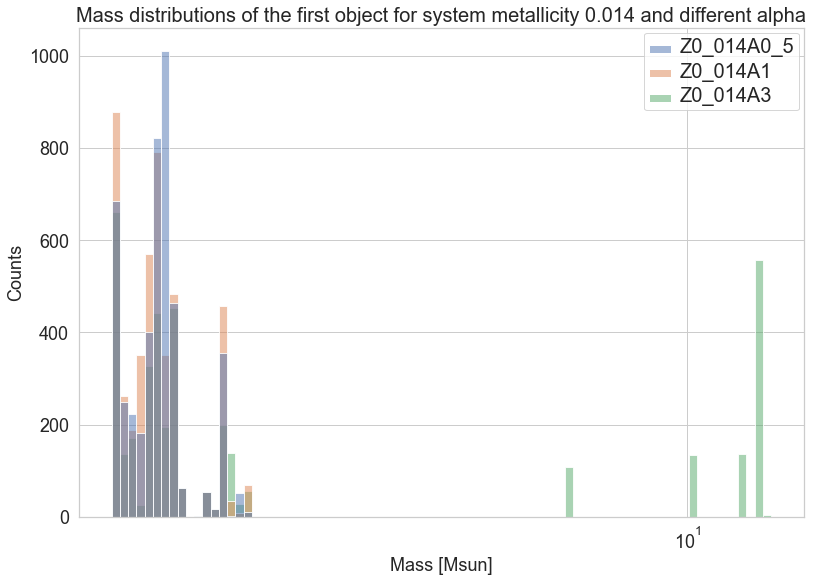

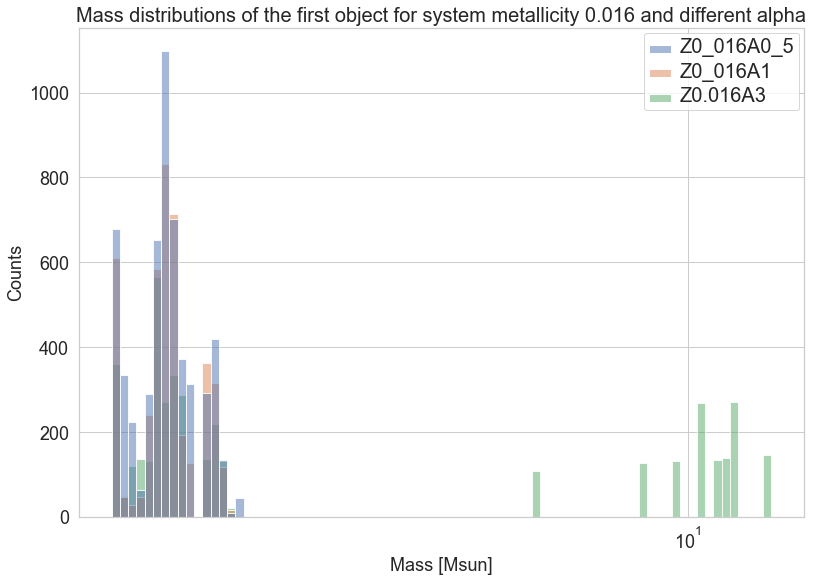

In [15]:
sns.set_style("whitegrid")
#bins = np.histogram(np.hstack((df_1['Mass_0_x'],df_2['Mass_0_x'],df_3['Mass_0_x'])), bins=bins)[1]
bins = 80
a = [3, 6, 9, 12]
b = [0, 3, 6, 9]
c = [1, 2, 3, 4]
count=0

for i,j,k in zip(a,b,c):
    fig = plt.figure(figsize=(13,9))
    #fig.add_subplot(2, 2, k)
    ax=sns.histplot(data=df_mass_0.iloc[:,j:i], bins=bins, alpha=0.5, log_scale=True, multiple='layer',legend=True)
    plt.title('Mass distributions of the first object for system metallicity ' + str(metallicity[count]) + ' and different alpha', fontsize=20)
    count+=1
    plt.xlabel('Mass [Msun]', fontsize=18)
    plt.ylabel('Counts', fontsize=18)
    plt.xticks(size = 18)
    plt.yticks(size = 18)
    plt.setp(ax.get_legend().get_texts(), fontsize='20')

    plt.show()



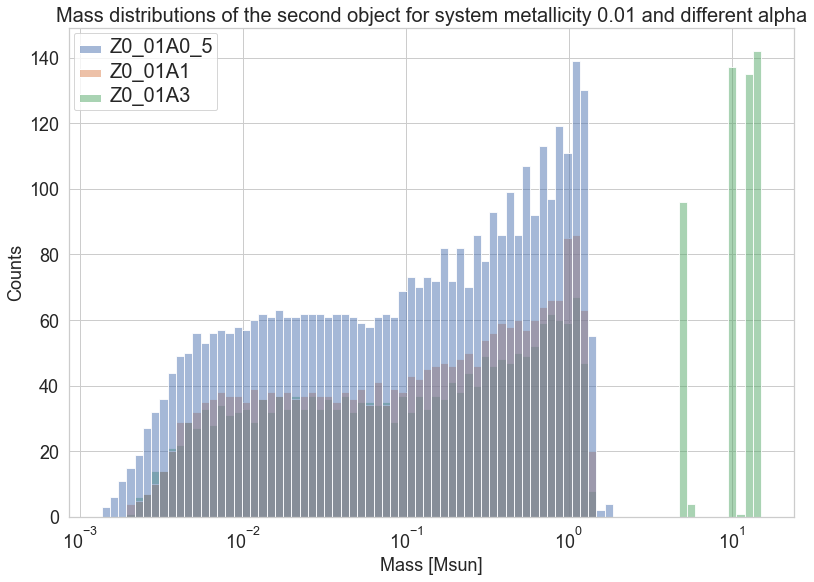

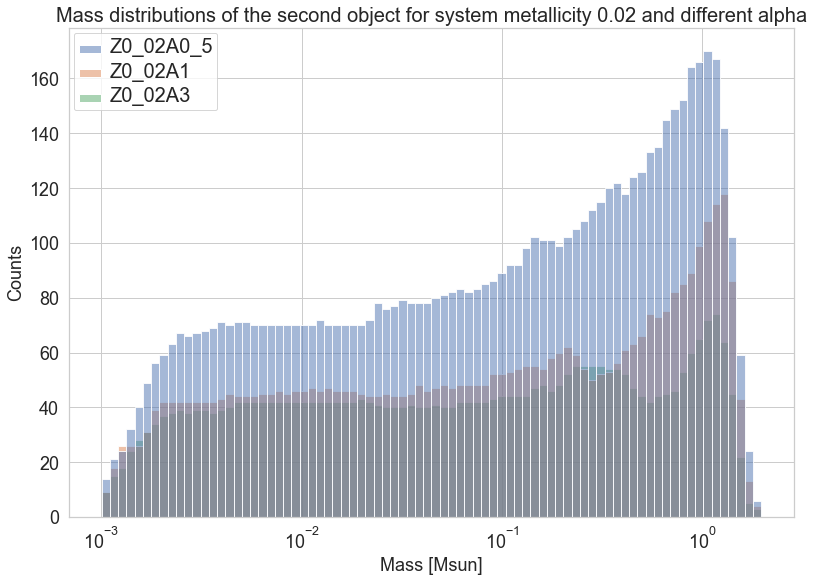

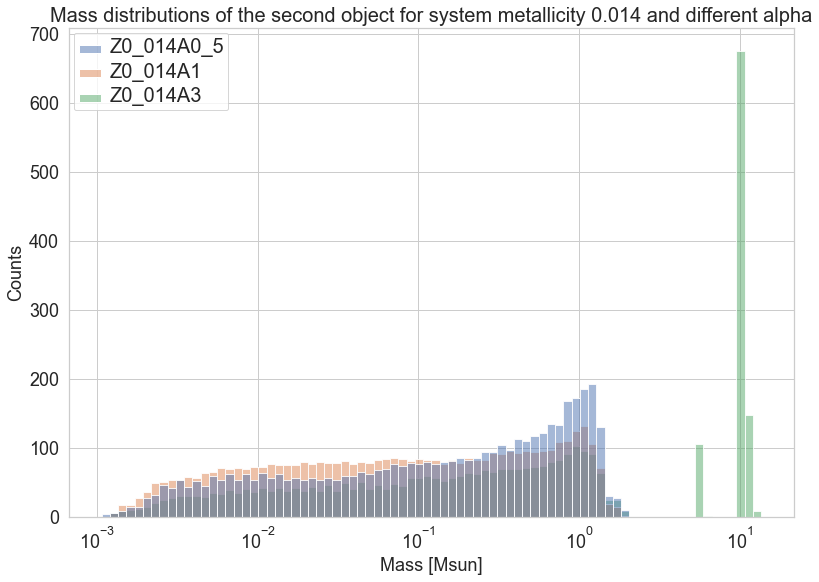

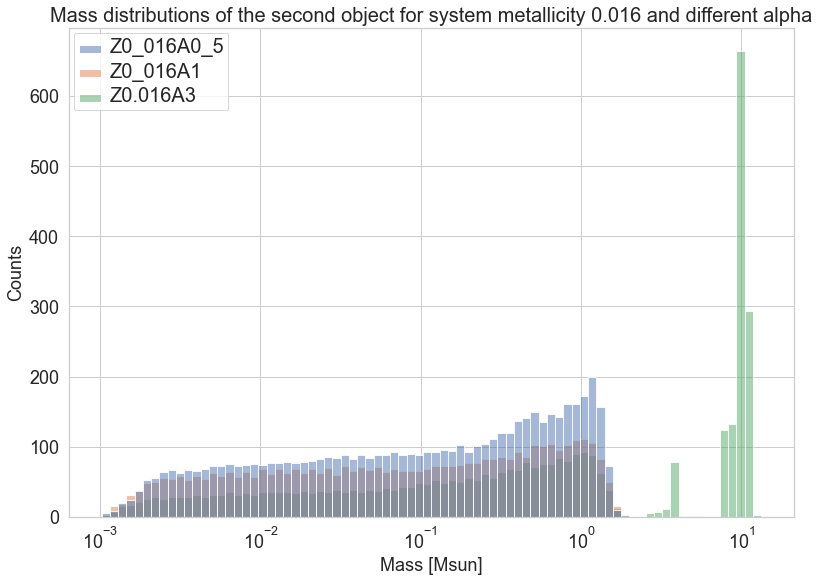

In [16]:
count=0

for i,j,k in zip(a,b,c):
    fig = plt.figure(figsize=(13,9))
    #fig.add_subplot(4, 3, k)
    ax=sns.histplot(data=df_mass_1.iloc[:,j:i], bins=bins, alpha=0.5, log_scale=True, multiple='layer',legend=True)
    plt.title('Mass distributions of the second object for system metallicity ' + str(metallicity[count]) + ' and different alpha', fontsize=20)
    count+=1
    plt.xlabel('Mass [Msun]', fontsize=18)
    plt.ylabel('Counts', fontsize=18)
    plt.xticks(size = 18)
    plt.yticks(size = 18)
    plt.setp(ax.get_legend().get_texts(), fontsize='20')

    plt.show()

(array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

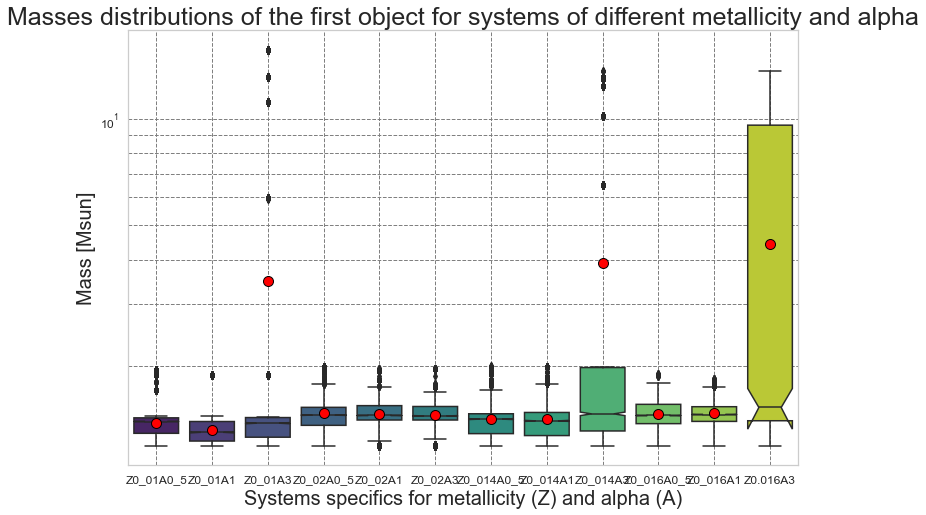

In [17]:
plt.figure(figsize=(12,8))

data_1 = []
for i in range(1,13):
    x = globals()["df_"+str(i)]
    data_1.append(x['Mass_0_x'])
df_time = pd.concat(data_1, axis = 1, keys = names)
g=sns.boxplot(data = df_time, palette="viridis", 
            showmeans=True, meanprops={"marker":"o",
                                       "markerfacecolor":"red", 
                                       "markeredgecolor":"black",
                                       "markersize":"10"},
            notch = True 
           )
g.set_yscale("log")
plt.grid(True,which="both",ls="--",c='gray') #gridlines
plt.title('Masses distributions of the first object for systems of different metallicity and alpha', fontsize=25)
plt.xlabel('Systems specifics for metallicity (Z) and alpha (A)', fontsize=20)
plt.ylabel('Mass [Msun]', fontsize=20)
plt.xticks(size = 12)
plt.yticks(size = 12)


(array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
        1.e+03]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

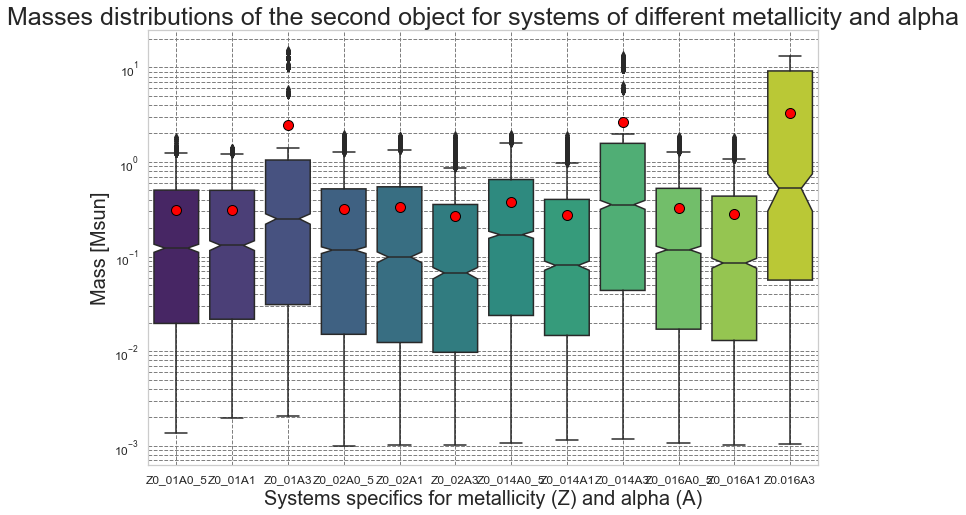

In [18]:
plt.figure(figsize=(12,8))

data_2 = []
for i in range(1,13):
    x = globals()["df_"+str(i)]
    data_2.append(x['Mass_1_x'])
df_time = pd.concat(data_2, axis = 1, keys = names)
g=sns.boxplot(data = df_time, palette="viridis", 
            showmeans=True, meanprops={"marker":"o",
                                       "markerfacecolor":"red", 
                                       "markeredgecolor":"black",
                                       "markersize":"10"},
            notch = True 
           )
g.set_yscale("log")
plt.grid(True,which="both",ls="--",c='gray') 
plt.title('Masses distributions of the second object for systems of different metallicity and alpha', fontsize=25)
plt.xlabel('Systems specifics for metallicity (Z) and alpha (A)', fontsize=20)
plt.ylabel('Mass [Msun]', fontsize=20)
plt.xticks(size = 12)
plt.yticks(size = 12)

In [19]:
data_p1 = []
for i in range(1,13):
    x = globals()["df_"+str(i)]
    data_p1.append(x['Phase_0'])
df_p1 = pd.concat(data_p1, axis = 1, keys = names)

data_p2 = []
for i in range(1,13):
    x = globals()["df_"+str(i)]
    data_p2.append(x['Phase_1'])
df_p2 = pd.concat(data_p2, axis = 1, keys = names)

for i in range(1,13):

    print("Phase of the first object           ",names[i-1])
    print("Phase 1: Zero age main sequence:    ",df_p1[df_p1[names[i-1]]==1].size)
    print("Phase 2: Terminal main sequence:    ",df_p1[df_p1[names[i-1]]==2].size)
    print("Phase 3: H-shell burning:           ",df_p1[df_p1[names[i-1]]==3].size)
    print("Phase 4: Core-He burning:           ",df_p1[df_p1[names[i-1]]==4].size)
    print("Phase 5: Terminal Core-He burning:  ",df_p1[df_p1[names[i-1]]==5].size)
    print("Phase 6: He-shell burning:          ",df_p1[df_p1[names[i-1]]==6].size)
    print("Phase 7: Remnant:                   ",df_p1[df_p1[names[i-1]]==7].size)
    print("\n")
    print("Phase of the second object          ",names[i-1])
    print("Phase 1: Zero age main sequence:    ",df_p2[df_p2[names[i-1]]==1].size)
    print("Phase 2: Terminal main sequence:    ",df_p2[df_p2[names[i-1]]==2].size)
    print("Phase 3: H-shell burning:           ",df_p2[df_p2[names[i-1]]==3].size)
    print("Phase 4: Core-He burning:           ",df_p2[df_p2[names[i-1]]==4].size)
    print("Phase 5: Terminal Core-He burning:  ",df_p2[df_p2[names[i-1]]==5].size)
    print("Phase 6: He-shell burning:          ",df_p2[df_p2[names[i-1]]==6].size)
    print("Phase 7: Remnant:                   ",df_p2[df_p2[names[i-1]]==7].size)
    print("\n")

Phase of the first object            Z0_01A0_5
Phase 1: Zero age main sequence:     0
Phase 2: Terminal main sequence:     0
Phase 3: H-shell burning:            0
Phase 4: Core-He burning:            0
Phase 5: Terminal Core-He burning:   0
Phase 6: He-shell burning:           0
Phase 7: Remnant:                    47352


Phase of the second object           Z0_01A0_5
Phase 1: Zero age main sequence:     47352
Phase 2: Terminal main sequence:     0
Phase 3: H-shell burning:            0
Phase 4: Core-He burning:            0
Phase 5: Terminal Core-He burning:   0
Phase 6: He-shell burning:           0
Phase 7: Remnant:                    0


Phase of the first object            Z0_01A1
Phase 1: Zero age main sequence:     0
Phase 2: Terminal main sequence:     0
Phase 3: H-shell burning:            0
Phase 4: Core-He burning:            0
Phase 5: Terminal Core-He burning:   0
Phase 6: He-shell burning:           0
Phase 7: Remnant:                    28104


Phase of the second obje

Phases of the second object are more interesting to classify because we already analysed the remnants of the first object.

In [20]:
df_p2=df_p2.replace(np.nan, 0) #replace NaN values to better handle them
pd.set_option('display.max_rows', 10)

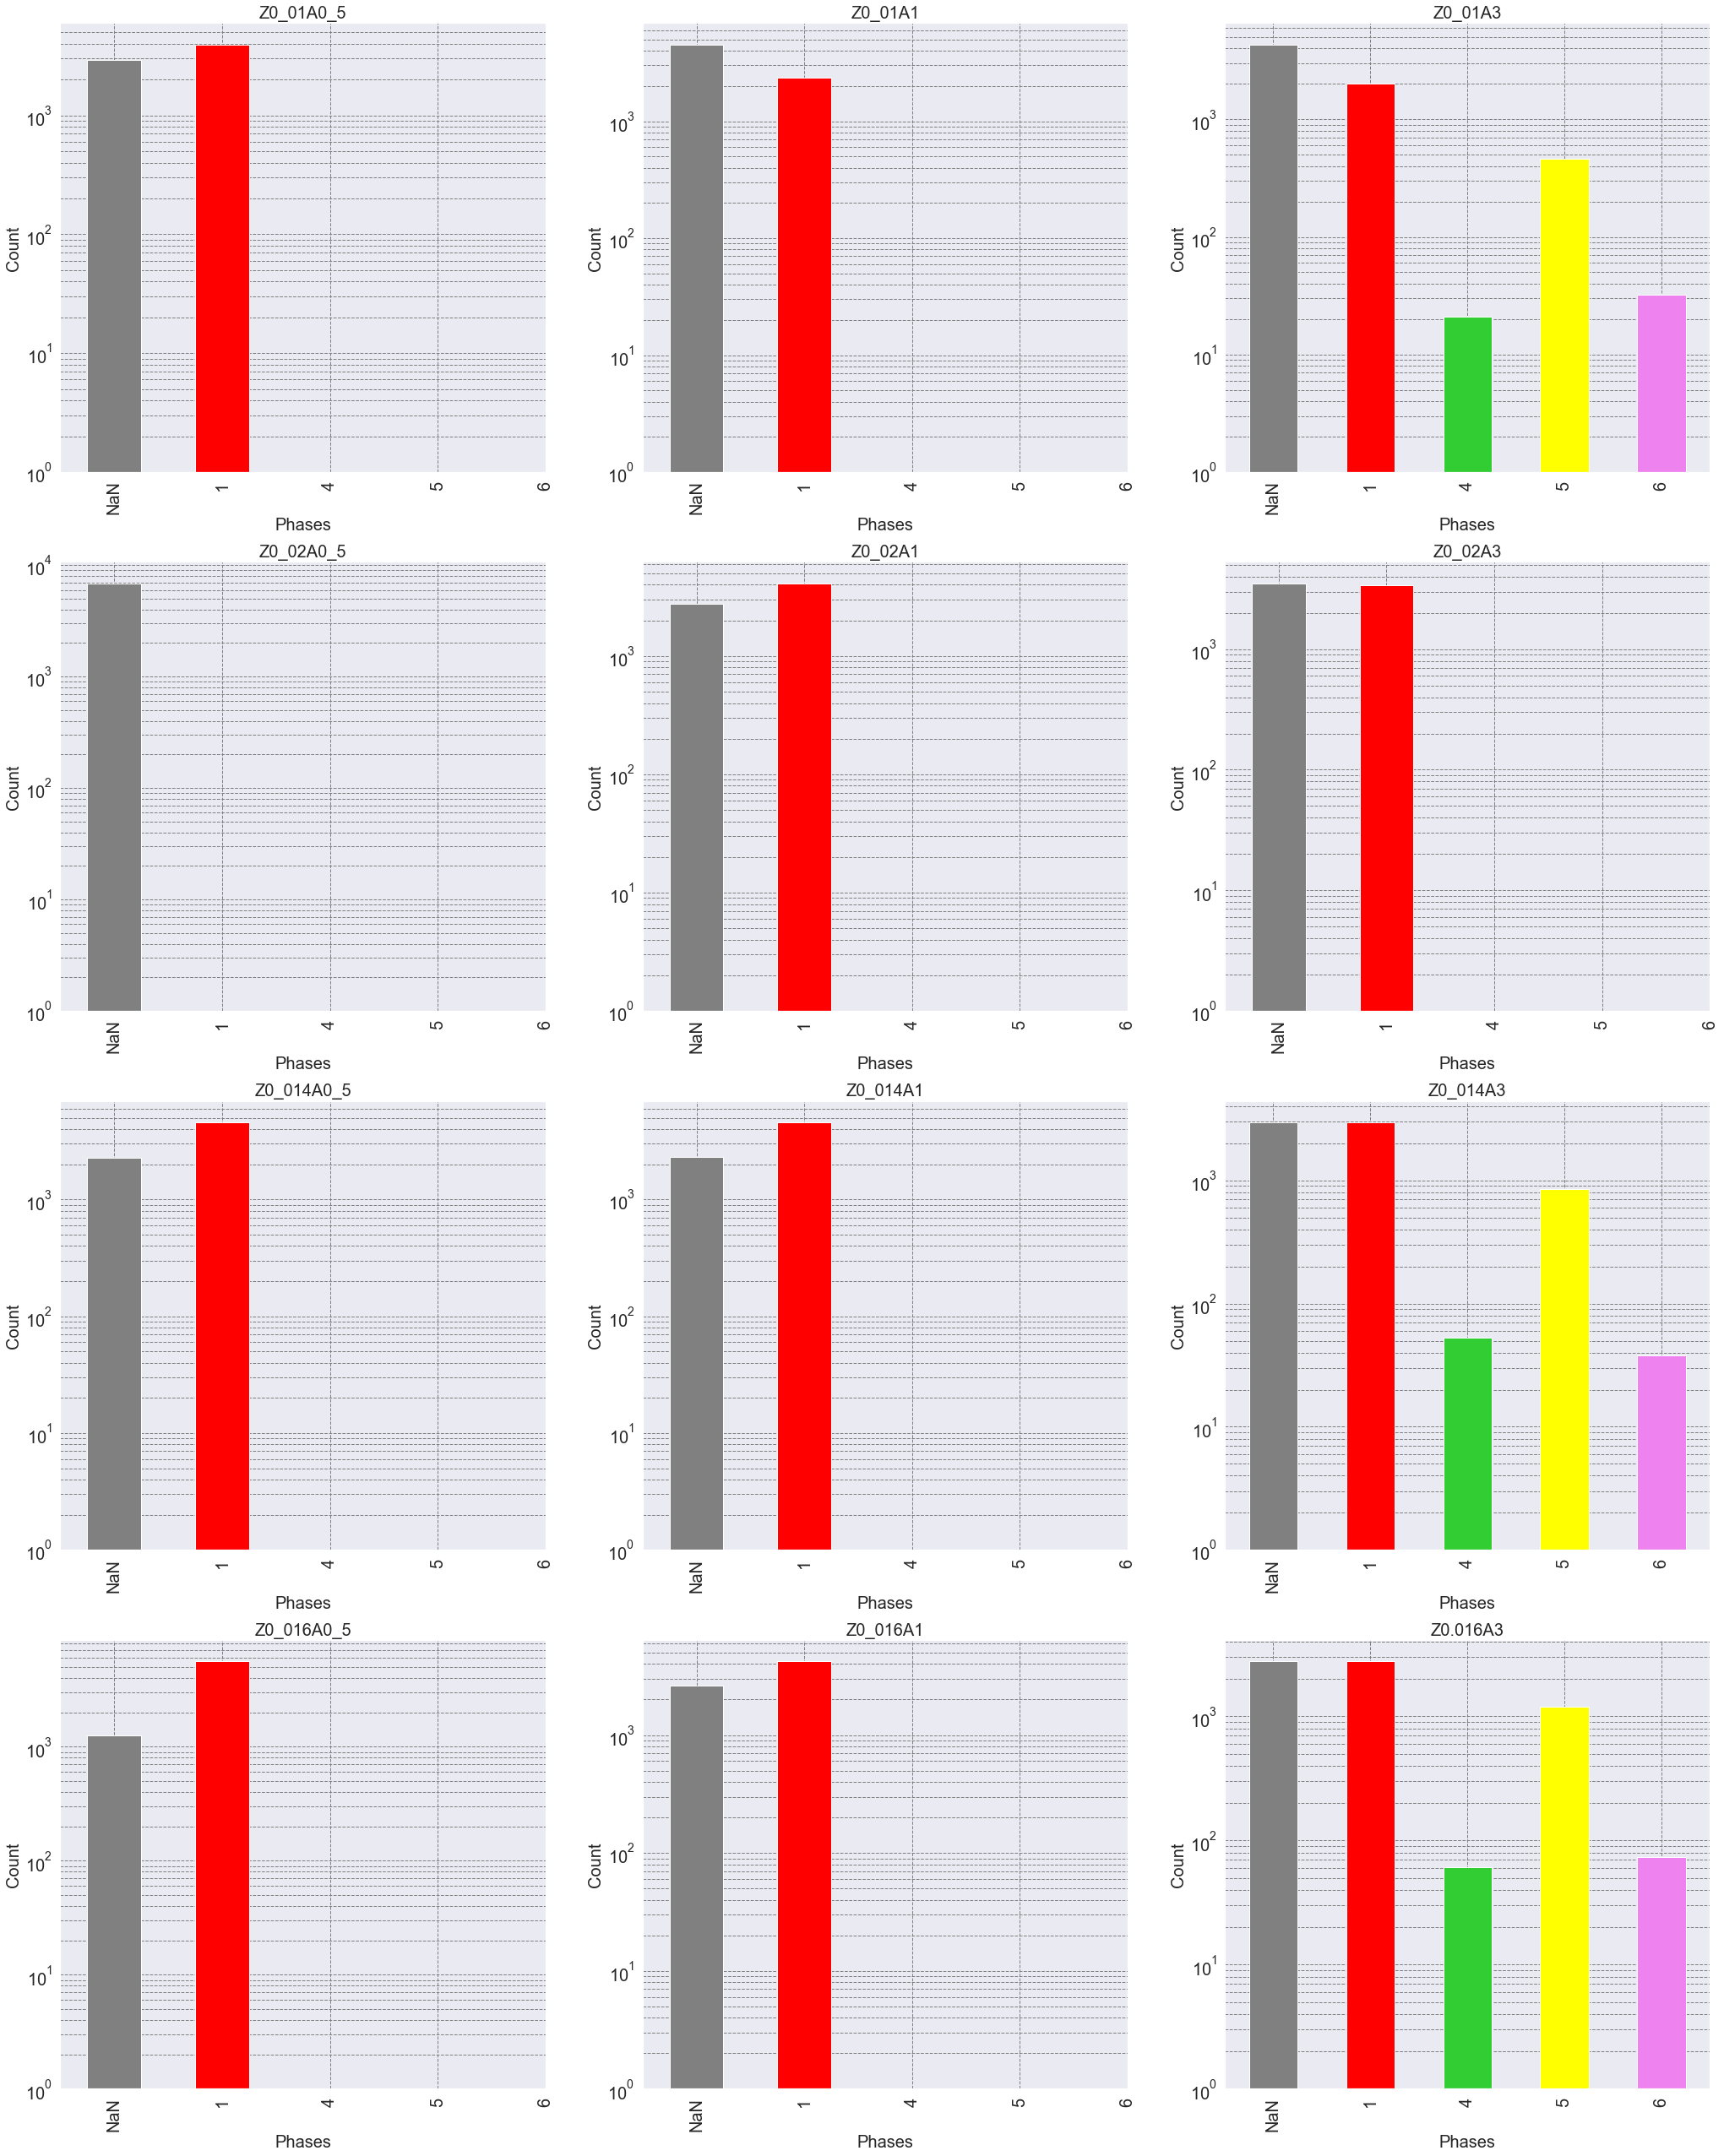

In [21]:
fig = plt.figure(figsize=(35, 45))
sns.set_style("dark")
for i in range(0,12):      
    fig.add_subplot(4, 3, i+1)
    df_p2[names[i]].value_counts().sort_index(ascending=True).plot.bar(color=
                                                                ['gray', 'red', 'limegreen',
                                                                'yellow', 'violet'], log=True)
    plt.grid(True,which="both",ls="--",c='gray') 
    plt.xticks(np.arange(5), ("NaN","1","4","5","6")) 
    plt.xlabel("Phases",fontsize=20)
    plt.ylabel("Count",fontsize=20)
    plt.title(names[i],fontsize=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
plt.show()


#### Plot the semi-major axis and the eccentricity of those systems

In [22]:
data_sma = []
for i in range(1,13):
    x = globals()["df_"+str(i)]
    data_sma.append(x['Semimajor'])
df_sma = pd.concat(data_sma, axis = 1, keys = names)

data_e = []
for i in range(1,13):
    x = globals()["df_"+str(i)]
    data_e.append(x['Eccentricity'])
df_e = pd.concat(data_e, axis = 1, keys = names)

data_BWt = []
for i in range(1,13):
    x = globals()["df_"+str(i)]
    data_BWt.append(x['BWorldtime'])
df_BWt = pd.concat(data_BWt, axis = 1, keys = names)

data_rl1 = []
for i in range(1,13):
    x = globals()["df_"+str(i)]
    data_rl1.append(x['RL0'])
df_rl1 = pd.concat(data_rl1, axis = 1, keys = names)

data_rl2 = []
for i in range(1,13):
    x = globals()["df_"+str(i)]
    data_rl2.append(x['RL1'])
df_rl2 = pd.concat(data_rl2, axis = 1, keys = names)

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

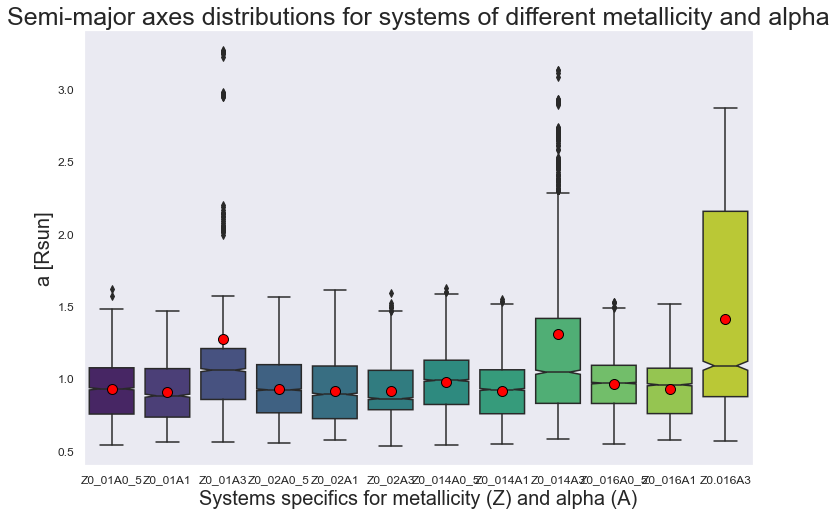

In [23]:
plt.figure(figsize=(12,8))

data_2 = []
for i in range(1,13):
    x = globals()["df_"+str(i)]
    data_2.append(x['Semimajor'])
df_time = pd.concat(data_2, axis = 1, keys = names)
g=sns.boxplot(data = df_time, palette="viridis", 
            showmeans=True, meanprops={"marker":"o",
                                       "markerfacecolor":"red", 
                                       "markeredgecolor":"black",
                                       "markersize":"10"},
            notch = True 
           )
#g.set_yscale("log")
#plt.grid(True,which="both",ls="--",c='gray') 
plt.title('Semi-major axes distributions for systems of different metallicity and alpha', fontsize=25)
plt.xlabel('Systems specifics for metallicity (Z) and alpha (A)', fontsize=20)
plt.ylabel('a [Rsun]', fontsize=20)
plt.xticks(size = 12)
plt.yticks(size = 12)

(array([1.e-23, 1.e-20, 1.e-17, 1.e-14, 1.e-11, 1.e-08, 1.e-05, 1.e-02,
        1.e+01, 1.e+04]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

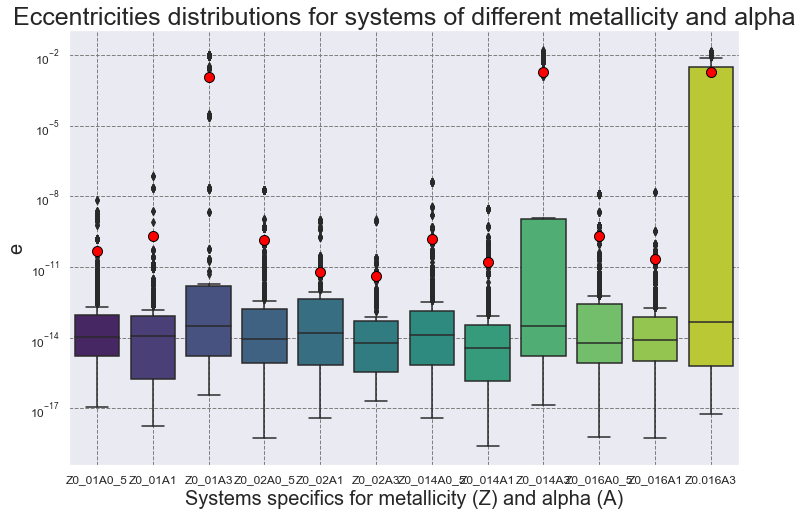

In [24]:
plt.figure(figsize=(12,8))

data_2 = []
for i in range(1,13):
    x = globals()["df_"+str(i)]
    data_2.append(x['Eccentricity'])
df_time = pd.concat(data_2, axis = 1, keys = names)
g=sns.boxplot(data = df_time, palette="viridis", 
            showmeans=True, meanprops={"marker":"o",
                                       "markerfacecolor":"red", 
                                       "markeredgecolor":"black",
                                       "markersize":"10"},
            notch = False 
           )
g.set_yscale("log")
plt.grid(True,which="both",ls="--",c='gray') 
plt.title('Eccentricities distributions for systems of different metallicity and alpha', fontsize=25)
plt.xlabel('Systems specifics for metallicity (Z) and alpha (A)', fontsize=20)
plt.ylabel('e', fontsize=20) 
plt.xticks(size = 12)
plt.yticks(size = 12)

In [25]:
df_sma_1=df_sma[[names[0], names[1], names[2]]]
df_sma_1

,Z0_01A0_5,Z0_01A1,Z0_01A3
0,1.122336,1.060035,1.115630
1,1.311343,1.087737,1.174169
2,1.257601,1.115605,1.203662
3,1.230591,1.143607,1.233260
4,1.203529,1.171710,1.262928
...,...,...,...
6873,NaN,NaN,NaN
6874,NaN,NaN,NaN
6875,NaN,NaN,NaN
6876,NaN,NaN,NaN


In [26]:
df_sma_1 = df_sma_1.stack().rename_axis(['level0', 'id']).reset_index().rename(columns={0:'sma'})
df_sma_1

,level0,id,sma
0,0,Z0_01A0_5,1.122336
1,0,Z0_01A1,1.060035
2,0,Z0_01A3,1.115630
3,1,Z0_01A0_5,1.311343
4,1,Z0_01A1,1.087737
...,...,...,...
8821,3941,Z0_01A0_5,1.284631
8822,3942,Z0_01A0_5,1.422566
8823,3943,Z0_01A0_5,1.387866
8824,3944,Z0_01A0_5,1.353283


In [27]:
df_BWt_1=df_BWt[[names[0], names[1], names[2]]]
df_BWt_1

,Z0_01A0_5,Z0_01A1,Z0_01A3
0,10.08322,10.08270,10.09789
1,10.10626,10.08487,10.10285
2,10.09856,10.08720,10.10561
3,10.09507,10.08971,10.10858
4,10.09180,10.09239,10.11177
...,...,...,...
6873,NaN,NaN,NaN
6874,NaN,NaN,NaN
6875,NaN,NaN,NaN
6876,NaN,NaN,NaN


In [28]:
df_BWt_1 = df_BWt_1.stack().rename_axis(['level0', 'id']).reset_index().rename(columns={0:'BWt'})
df_BWt_1

,level0,id,BWt
0,0,Z0_01A0_5,10.083220
1,0,Z0_01A1,10.082700
2,0,Z0_01A3,10.097890
3,1,Z0_01A0_5,10.106260
4,1,Z0_01A1,10.084870
...,...,...,...
8821,3941,Z0_01A0_5,9.453027
8822,3942,Z0_01A0_5,9.464738
8823,3943,Z0_01A0_5,9.461474
8824,3944,Z0_01A0_5,9.458444


In [29]:
df_sma_BWt = pd.concat([df_BWt_1['id'], df_sma_1['sma'], df_BWt_1['BWt']], axis=1)
df_sma_BWt

,id,sma,BWt
0,Z0_01A0_5,1.122336,10.083220
1,Z0_01A1,1.060035,10.082700
2,Z0_01A3,1.115630,10.097890
3,Z0_01A0_5,1.311343,10.106260
4,Z0_01A1,1.087737,10.084870
...,...,...,...
8821,Z0_01A0_5,1.284631,9.453027
8822,Z0_01A0_5,1.422566,9.464738
8823,Z0_01A0_5,1.387866,9.461474
8824,Z0_01A0_5,1.353283,9.458444


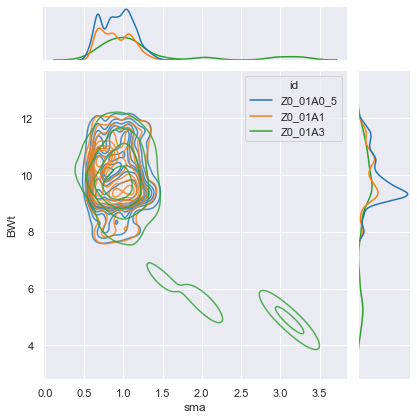

In [30]:
sns.set_style("darkgrid")

axs = sns.jointplot(data=df_sma_BWt, x="sma", y="BWt",
                     hue="id", kind="kde", fill=False, legend=True, alpha=.8 , palette="tab10")

In [31]:
df_sma_1

,level0,id,sma
0,0,Z0_01A0_5,1.122336
1,0,Z0_01A1,1.060035
2,0,Z0_01A3,1.115630
3,1,Z0_01A0_5,1.311343
4,1,Z0_01A1,1.087737
...,...,...,...
8821,3941,Z0_01A0_5,1.284631
8822,3942,Z0_01A0_5,1.422566
8823,3943,Z0_01A0_5,1.387866
8824,3944,Z0_01A0_5,1.353283


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    
    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

In [33]:
import warnings
warnings.filterwarnings("ignore")

                  Bivariate distribution plots (Age of system vs Semi-major axis) with constant metallicity


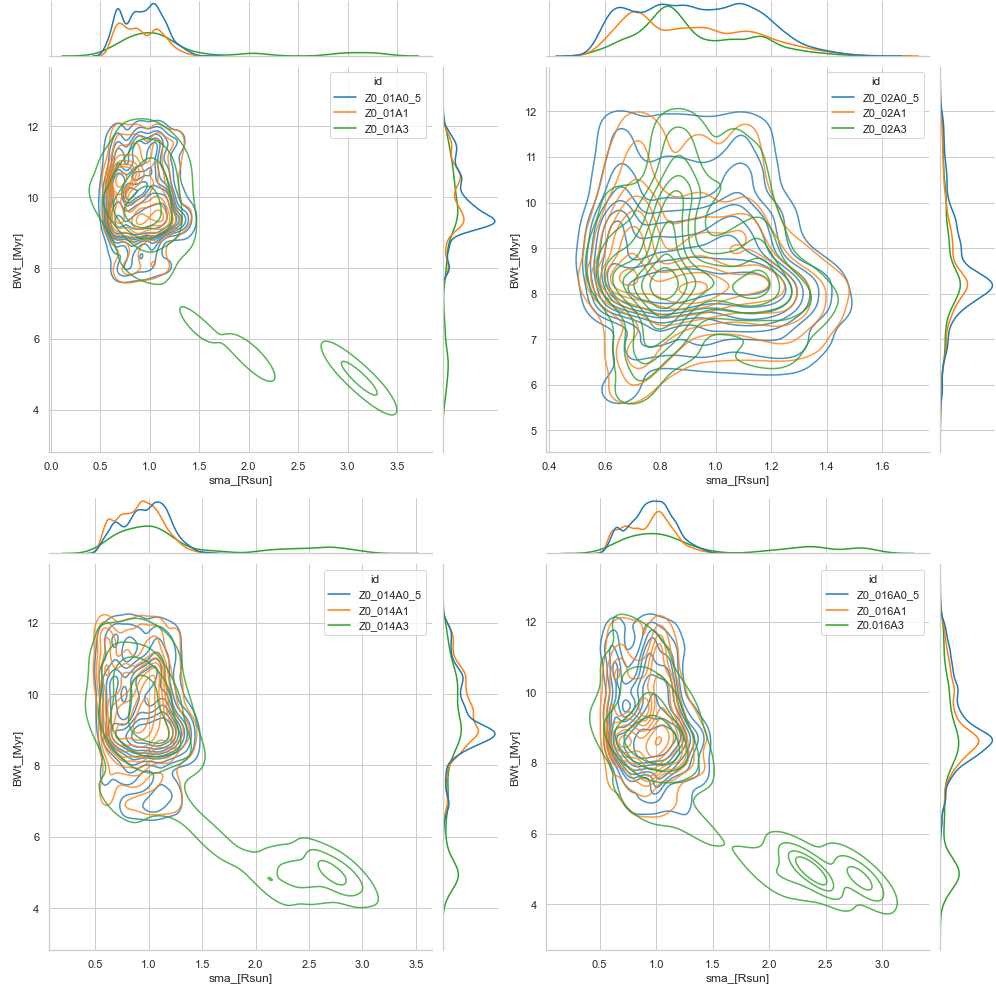

In [34]:
print('                  Bivariate distribution plots (Age of system vs Semi-major axis) with constant metallicity')
fig = plt.figure(figsize=(14, 14))
for i,j in zip(range(0, 12, 3),range(0,4)):
    df_sma_1=df_sma[[names[i], names[i+1], names[i+2]]]
    df_sma_1 = df_sma_1.stack().rename_axis(['level0', 'id']).reset_index().rename(columns={0:'sma_[Rsun]'})
    df_BWt_1=df_BWt[[names[i], names[i+1], names[i+2]]]
    df_BWt_1 = df_BWt_1.stack().rename_axis(['level0', 'id']).reset_index().rename(columns={0:'BWt_[Myr]'})
    df_sma_BWt = pd.concat([df_BWt_1['id'], df_sma_1['sma_[Rsun]'], df_BWt_1['BWt_[Myr]']], axis=1)
    sns.set_style("whitegrid")
    globals()["g"+str(j)] = sns.jointplot(data=df_sma_BWt, x="sma_[Rsun]", y="BWt_[Myr]",
                     hue="id", kind="kde", fill=False, legend=True, alpha=.8 , palette="tab10")

gs = gridspec.GridSpec(2, 2, figure=None, left=None, 
                        bottom=None, right=None, top=None, wspace=None, 
                        hspace=None, width_ratios=None, height_ratios=None)
for j in range(0,4):
    x = globals()["g"+str(j)]
    fg = SeabornFig2Grid(x, fig, gs[j])
plt.grid(False)
gs.tight_layout(fig)
plt.show()

                  Bivariate distribution plots (compact object Roche Lobe vs Semi-major axis) with constant metallicity


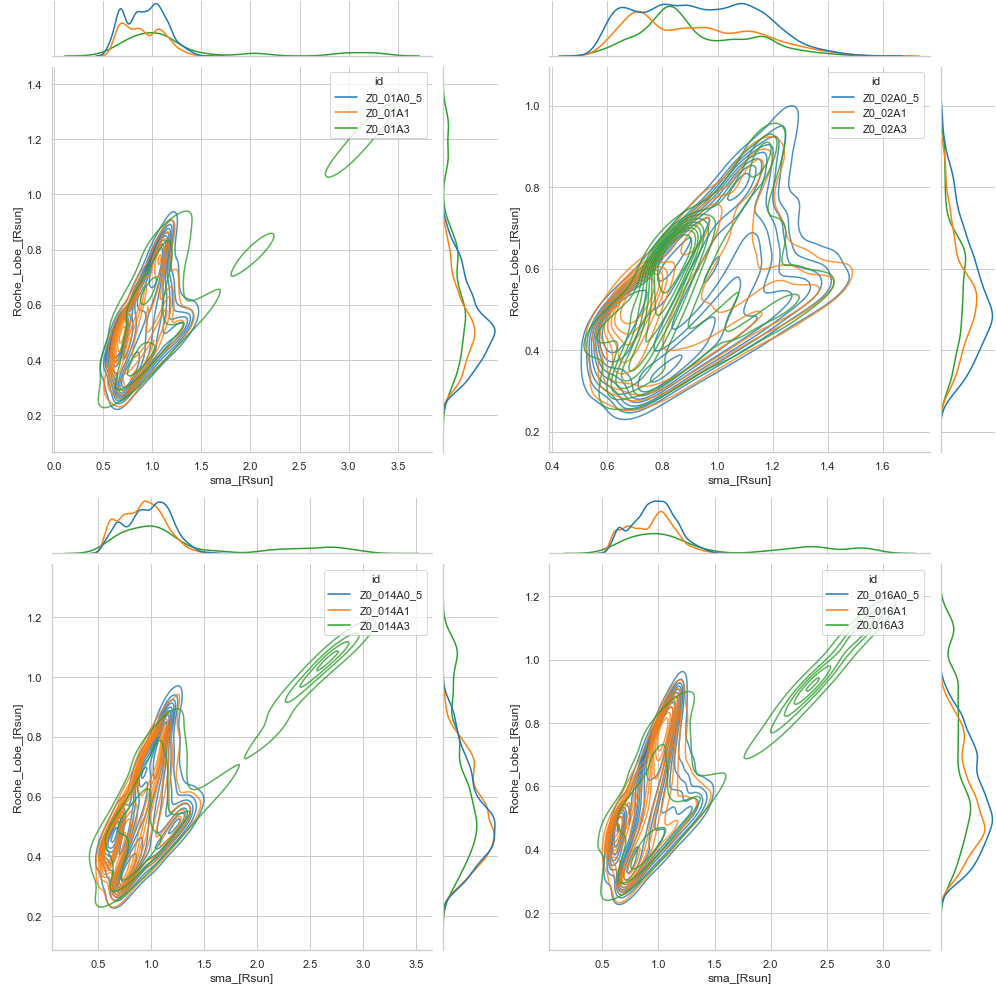

In [35]:
print('                  Bivariate distribution plots (compact object Roche Lobe vs Semi-major axis) with constant metallicity')
fig = plt.figure(figsize=(14, 14))
for i,j in zip(range(0, 12, 3),range(0,4)):
    df_sma_1=df_sma[[names[i], names[i+1], names[i+2]]]
    df_sma_1 = df_sma_1.stack().rename_axis(['level0', 'id']).reset_index().rename(columns={0:'sma_[Rsun]'})
    df_rl1_1=df_rl1[[names[i], names[i+1], names[i+2]]]
    df_rl1_1 = df_rl1_1.stack().rename_axis(['level0', 'id']).reset_index().rename(columns={0:'Roche_Lobe_[Rsun]'})
    df_sma_rl1 = pd.concat([df_rl1_1['id'], df_sma_1['sma_[Rsun]'], df_rl1_1['Roche_Lobe_[Rsun]']], axis=1)
    sns.set_style("whitegrid")
    globals()["g"+str(j)] = sns.jointplot(data=df_sma_rl1, x="sma_[Rsun]", y="Roche_Lobe_[Rsun]",
                     hue="id", kind="kde", fill=False, legend=True, alpha=.8 , palette="tab10")

gs = gridspec.GridSpec(2, 2, figure=None, left=None, 
                        bottom=None, right=None, top=None, wspace=None, 
                        hspace=None, width_ratios=None, height_ratios=None)
for j in range(0,4):
    x = globals()["g"+str(j)]
    fg = SeabornFig2Grid(x, fig, gs[j])
plt.grid(False)
gs.tight_layout(fig)
plt.show()

                  Bivariate distribution plots (companion star Roche Lobe vs Semi-major axis) with constant metallicity


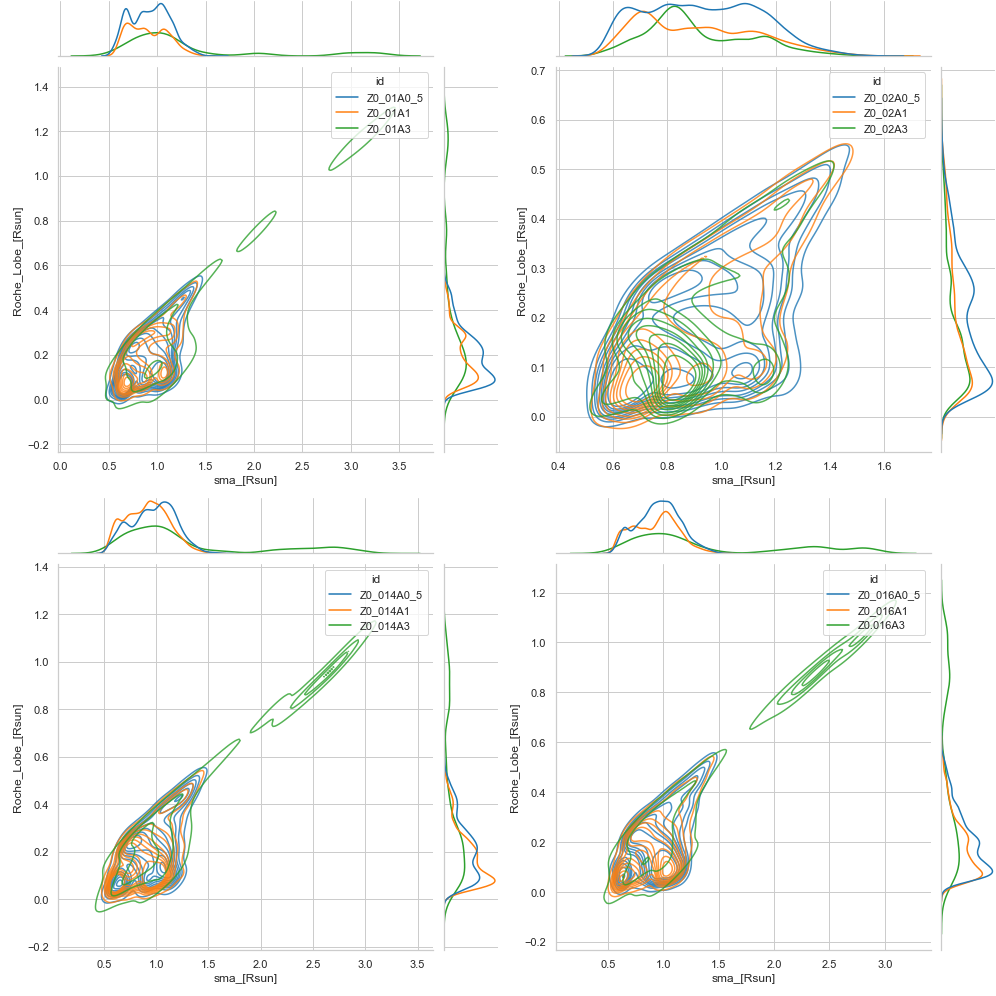

In [36]:
print('                  Bivariate distribution plots (companion star Roche Lobe vs Semi-major axis) with constant metallicity')
fig = plt.figure(figsize=(14, 14))
for i,j in zip(range(0, 12, 3),range(0,4)):
    df_sma_1=df_sma[[names[i], names[i+1], names[i+2]]]
    df_sma_1 = df_sma_1.stack().rename_axis(['level0', 'id']).reset_index().rename(columns={0:'sma_[Rsun]'})
    df_rl2_1=df_rl2[[names[i], names[i+1], names[i+2]]]
    df_rl2_1 = df_rl2_1.stack().rename_axis(['level0', 'id']).reset_index().rename(columns={0:'Roche_Lobe_[Rsun]'})
    df_sma_rl2 = pd.concat([df_sma_1['id'], df_sma_1['sma_[Rsun]'], df_rl2_1['Roche_Lobe_[Rsun]']], axis=1)
    sns.set_style("whitegrid")
    globals()["g"+str(j)] = sns.jointplot(data=df_sma_rl2, x="sma_[Rsun]", y="Roche_Lobe_[Rsun]",
                     hue="id", kind="kde", fill=False, legend=True, alpha=.8 , palette="tab10")

gs = gridspec.GridSpec(2, 2, figure=None, left=None, 
                        bottom=None, right=None, top=None, wspace=None, 
                        hspace=None, width_ratios=None, height_ratios=None)
for j in range(0,4):
    x = globals()["g"+str(j)]
    fg = SeabornFig2Grid(x, fig, gs[j])
plt.grid(False)
gs.tight_layout(fig)
plt.show()

                  Bivariate distribution plots (companion star RL vs compact object RL) with constant metallicity


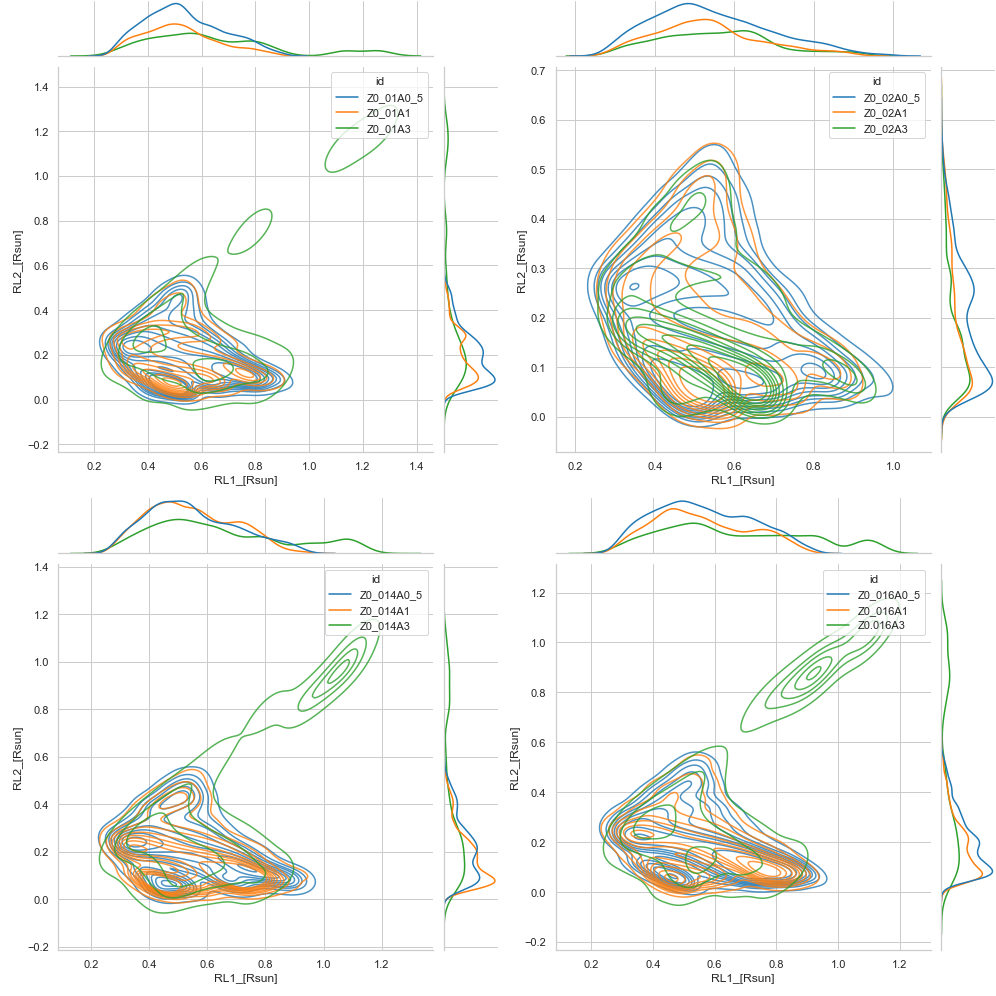

In [37]:
print('                  Bivariate distribution plots (companion star RL vs compact object RL) with constant metallicity')
fig = plt.figure(figsize=(14, 14))
for i,j in zip(range(0, 12, 3),range(0,4)):
    df_rl1_1= df_rl1[[names[i], names[i+1], names[i+2]]]
    df_rl1_1 = df_rl1_1.stack().rename_axis(['level0', 'id']).reset_index().rename(columns={0:'RL1_[Rsun]'})
    df_rl2_1=df_rl2[[names[i], names[i+1], names[i+2]]]
    df_rl2_1 = df_rl2_1.stack().rename_axis(['level0', 'id']).reset_index().rename(columns={0:'RL2_[Rsun]'})
    df_rl1_rl2 = pd.concat([df_rl1_1['id'], df_rl1_1['RL1_[Rsun]'], df_rl2_1['RL2_[Rsun]']], axis=1)
    sns.set_style("whitegrid")
    globals()["g"+str(j)] = sns.jointplot(data=df_rl1_rl2, x="RL1_[Rsun]", y="RL2_[Rsun]",
                     hue="id", kind="kde", fill=False, legend=True, alpha=.8 , palette="tab10")

gs = gridspec.GridSpec(2, 2, figure=None, left=None, 
                        bottom=None, right=None, top=None, wspace=None, 
                        hspace=None, width_ratios=None, height_ratios=None)
for j in range(0,4):
    x = globals()["g"+str(j)]
    fg = SeabornFig2Grid(x, fig, gs[j])
plt.grid(False)
gs.tight_layout(fig)
plt.show()

In [38]:
# sns.set_style("whitegrid")
# plt.figure(figsize=(30,30))
# g=sns.jointplot(
#     data=df_1,
#     x='Semimajor', y='Eccentricity',
#     kind="kde"
# )


In [39]:
data_m0_x = []
for i in range(1,13):
    x = globals()["df_"+str(i)]
    data_m0_x.append(x['Mass_0_x'])
df_m0_x = pd.concat(data_m0_x, axis = 1, keys = names)

data_m1_x = []
for i in range(1,13):
    x = globals()["df_"+str(i)]
    data_m1_x.append(x['Mass_1_x'])
df_m1_x = pd.concat(data_m1_x, axis = 1, keys = names)

In [40]:
df_m1_x

,Z0_01A0_5,Z0_01A1,Z0_01A3,Z0_02A0_5,Z0_02A1,Z0_02A3,Z0_014A0_5,Z0_014A1,Z0_014A3,Z0_016A0_5,Z0_016A1,Z0.016A3
0,1.030051,1.218264,1.201622,1.391280,1.401552,0.012978,0.589054,0.017015,0.840698,0.015079,0.019047,0.600186
1,0.747860,1.164110,1.097205,0.002666,1.339080,0.103457,0.445981,0.005003,1.057632,0.138306,0.020933,0.259657
2,0.819655,1.112328,1.048398,0.019255,0.872897,0.108444,0.467186,0.004773,1.010233,0.131954,0.021944,0.247784
3,0.858045,1.062814,1.001726,0.018369,0.957043,0.113670,0.489385,0.004554,0.964930,0.125893,0.023005,0.236449
4,0.898197,1.015470,0.957097,0.017524,1.002058,0.119146,0.512622,0.004344,0.921632,0.120109,0.024117,0.225628
...,...,...,...,...,...,...,...,...,...,...,...,...
6873,NaN,NaN,NaN,0.025685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6874,NaN,NaN,NaN,0.026927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6875,NaN,NaN,NaN,0.028228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6876,NaN,NaN,NaN,0.019410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_m0_x_s = df_m0_x.stack().rename_axis(['level0', 'id']).reset_index().rename(columns={0:'M0'})
df_m1_x_s = df_m1_x.stack().rename_axis(['level0', 'id']).reset_index().rename(columns={0:'M1'})


In [42]:
df_m0_x_s

,level0,id,M0
0,0,Z0_01A0_5,1.248605
1,0,Z0_01A1,1.248605
2,0,Z0_01A3,1.248605
3,0,Z0_02A0_5,1.429796
4,0,Z0_02A1,1.429796
...,...,...,...
50216,6873,Z0_02A0_5,1.438407
50217,6874,Z0_02A0_5,1.438407
50218,6875,Z0_02A0_5,1.438407
50219,6876,Z0_02A0_5,1.439257


In [43]:
df_m0_m1 = pd.concat([df_m1_x_s['id'], df_m1_x_s['M1'], df_m0_x_s['M0']], axis=1)

In [44]:
df_m0_m1

,id,M1,M0
0,Z0_01A0_5,1.030051,1.248605
1,Z0_01A1,1.218264,1.248605
2,Z0_01A3,1.201622,1.248605
3,Z0_02A0_5,1.391280,1.429796
4,Z0_02A1,1.401552,1.429796
...,...,...,...
50216,Z0_02A0_5,0.025685,1.438407
50217,Z0_02A0_5,0.026927,1.438407
50218,Z0_02A0_5,0.028228,1.438407
50219,Z0_02A0_5,0.019410,1.439257


In [45]:
df_m0_m1['Result'] = df_m0_m1['M0']/df_m0_m1['M1']


In [46]:
df_m0_m1

,id,M1,M0,Result
0,Z0_01A0_5,1.030051,1.248605,1.212178
1,Z0_01A1,1.218264,1.248605,1.024905
2,Z0_01A3,1.201622,1.248605,1.039100
3,Z0_02A0_5,1.391280,1.429796,1.027684
4,Z0_02A1,1.401552,1.429796,1.020152
...,...,...,...,...
50216,Z0_02A0_5,0.025685,1.438407,56.001764
50217,Z0_02A0_5,0.026927,1.438407,53.419397
50218,Z0_02A0_5,0.028228,1.438407,50.956131
50219,Z0_02A0_5,0.019410,1.439257,74.149901


In [47]:
df_sma

,Z0_01A0_5,Z0_01A1,Z0_01A3,Z0_02A0_5,Z0_02A1,Z0_02A3,Z0_014A0_5,Z0_014A1,Z0_014A3,Z0_016A0_5,Z0_016A1,Z0.016A3
0,1.122336,1.060035,1.115630,1.451726,1.434065,1.051164,0.849492,0.551104,0.841190,0.945480,0.988289,0.795767
1,1.311343,1.087737,1.174169,0.610548,1.470936,0.969121,0.932836,0.556729,0.751940,0.848013,0.986565,1.006700
2,1.257601,1.115605,1.203662,0.603526,1.379248,0.964956,0.919480,0.556836,0.769782,0.852557,0.985643,1.016052
3,1.230591,1.143607,1.233260,0.603900,1.324884,0.960629,0.905897,0.556939,0.787649,0.856939,0.984678,1.025141
4,1.203529,1.171710,1.262928,0.604257,1.297502,0.956134,0.892096,0.557037,0.805519,0.861161,0.983667,1.033968
...,...,...,...,...,...,...,...,...,...,...,...,...
6873,NaN,NaN,NaN,1.070980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6874,NaN,NaN,NaN,1.069961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6875,NaN,NaN,NaN,1.068894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6876,NaN,NaN,NaN,1.160104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df_sma = df_sma.stack().rename_axis(['level0', 'id']).reset_index().rename(columns={0:'a_[Msun]'})

In [49]:
df_sma

,level0,id,a_[Msun]
0,0,Z0_01A0_5,1.122336
1,0,Z0_01A1,1.060035
2,0,Z0_01A3,1.115630
3,0,Z0_02A0_5,1.451726
4,0,Z0_02A1,1.434065
...,...,...,...
50216,6873,Z0_02A0_5,1.070980
50217,6874,Z0_02A0_5,1.069961
50218,6875,Z0_02A0_5,1.068894
50219,6876,Z0_02A0_5,1.160104


In [50]:
df_a_m = pd.concat([df_sma['id'], df_m0_m1['Result'], df_sma['a_[Msun]']], axis=1)

In [51]:
df_a_m['id']

0        Z0_01A0_5
1          Z0_01A1
2          Z0_01A3
3        Z0_02A0_5
4          Z0_02A1
           ...    
50216    Z0_02A0_5
50217    Z0_02A0_5
50218    Z0_02A0_5
50219    Z0_02A0_5
50220    Z0_02A0_5
Name: id, Length: 50221, dtype: object

<AxesSubplot:xlabel='a_[Msun]', ylabel='Result'>

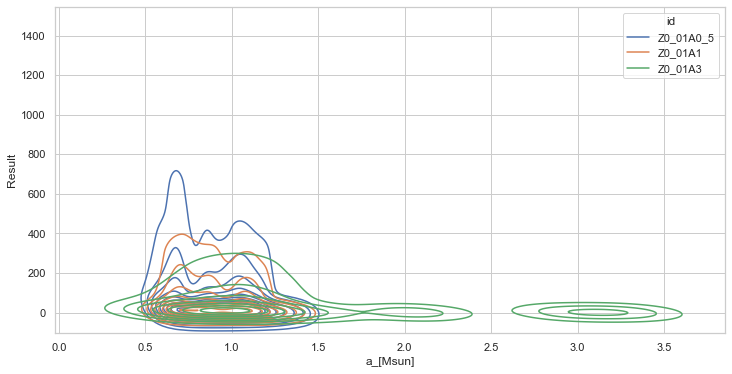

In [52]:
plt.figure(figsize=(12,6))
sub1 = df_a_m[(df_a_m['id'].str.contains('Z0_01A0_5')) | (df_a_m['id'].str.contains('Z0_01A1')) | (df_a_m['id'].str.contains('Z0_01A3'))]
sns.kdeplot(data=sub1, x="a_[Msun]", y="Result", hue="id")

#### Check some intial conditions (initial masses and initial orbital properties) leading to the formation of the LMXBs

(array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

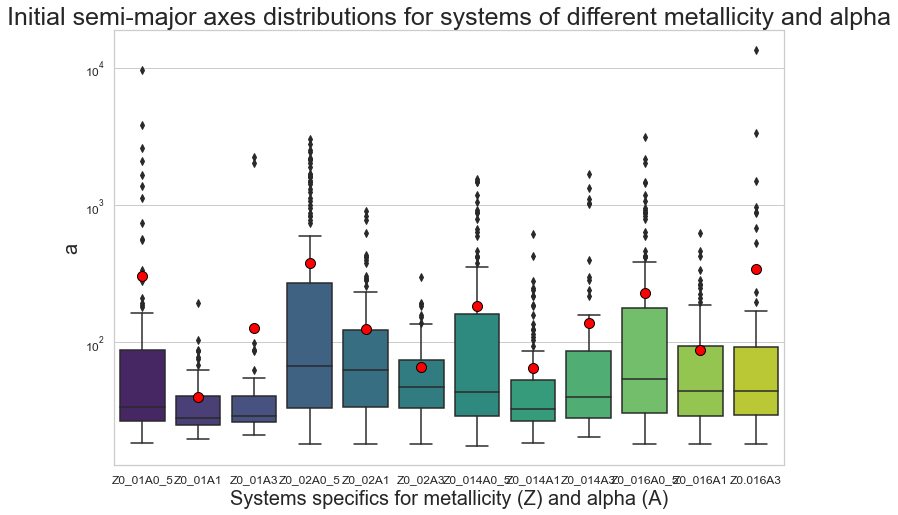

In [53]:
plt.figure(figsize=(12,8))

data_2 = []
for i in range(1,13):
    x = globals()["df_"+str(i)]
    x = x.drop_duplicates(subset = ["ID"])
    data_2.append(x['a'])
df_time = pd.concat(data_2, axis = 1, keys = names)
g=sns.boxplot(data = df_time, palette="viridis", 
            showmeans=True, meanprops={"marker":"o",
                                       "markerfacecolor":"red", 
                                       "markeredgecolor":"black",
                                       "markersize":"10"},
            notch = False 
           )
g.set_yscale("log")
#plt.grid(True,which="both",ls="--",c='gray') 
plt.title('Initial semi-major axes distributions for systems of different metallicity and alpha', fontsize=25)
plt.xlabel('Systems specifics for metallicity (Z) and alpha (A)', fontsize=20)
plt.ylabel('a', fontsize=20) 
plt.xticks(size = 12)
plt.yticks(size = 12)

(array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
        1.e-01, 1.e+00, 1.e+01, 1.e+02]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

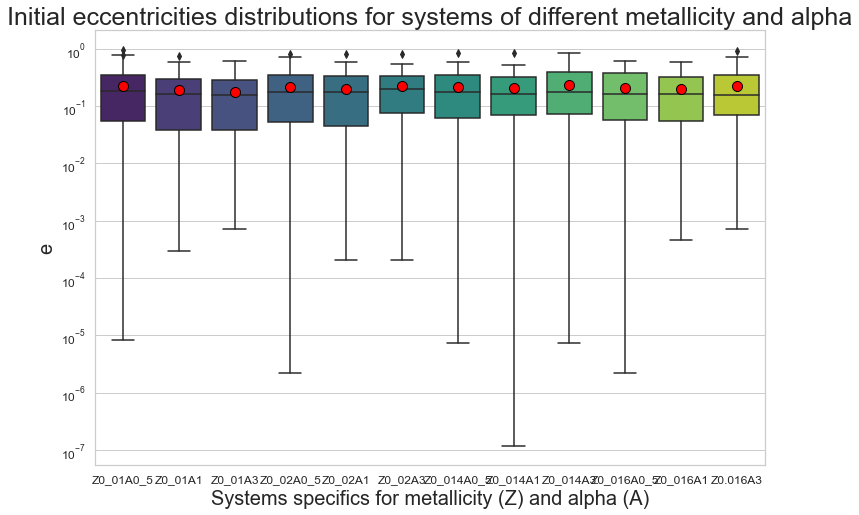

In [54]:
plt.figure(figsize=(12,8))

data_2 = []
for i in range(1,13):
    x = globals()["df_"+str(i)]
    x = x.drop_duplicates(subset = ["ID"])
    data_2.append(x['e'])
df_time = pd.concat(data_2, axis = 1, keys = names)
g=sns.boxplot(data = df_time, palette="viridis", 
            showmeans=True, meanprops={"marker":"o",
                                       "markerfacecolor":"red", 
                                       "markeredgecolor":"black",
                                       "markersize":"10"},
            notch = False 
           )
g.set_yscale("log")
#plt.grid(True,which="both",ls="--",c='gray') 
plt.title('Initial eccentricities distributions for systems of different metallicity and alpha', fontsize=25)
plt.xlabel('Systems specifics for metallicity (Z) and alpha (A)', fontsize=20)
plt.ylabel('e', fontsize=20) 
plt.xticks(size = 12)
plt.yticks(size = 12)